In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

---
# **Universidad de San Carlos de Guatemala**  
## **Escuela de Ciencias Físicas y Matemáticas**    
**Laboratorio de reducción de datos**  
**Dulce María Mayorga Vásquez; 202306444**  
**Práctica 01 - Estimación de $\pi$ con el método de Monte Carlo**   
**13 de marzo de 2025** 
---


# Practica 1

## Estimación de π con el Método de Monte Carlo

El método de Monte Carlo es una técnica de simulación que utiliza números aleatorios para resolver problemas matemáticos. En este caso, lo utilizamos para estimar el valor de $\pi$ de la siguiente manera:

### Procedimiento:

1. **Generar puntos aleatorios**: Imaginamos un cuadrado de lado 2, y dentro de él un círculo con radio 1. El área del cuadrado es 4, y el área del círculo es $\pi r^2$ donde $r = 1$, por lo que el área del círculo es $\pi$.

2. **Definir los límites**:
   - El cuadrado tiene sus vértices en los puntos $(-1, -1)$, $(1, -1)$, $(1, 1)$, $(-1, 1)$.
   - El círculo tiene su centro en el origen $(0, 0)$ y un radio de 1.

3. **Simular puntos aleatorios**:
   - Generamos puntos aleatorios dentro del cuadrado, es decir, sus coordenadas $x$ y $y$ se generan de forma aleatoria en el rango $[-1, 1]$.

4. **Contar cuántos puntos caen dentro del círculo**:
   - Para determinar si un punto está dentro del círculo, usamos la ecuación de un círculo:
     $$
     x^2 + y^2 \leq 1
     $$

5. **Estimar $\pi$**:
   - La proporción de puntos que caen dentro del círculo con respecto al total de puntos generados debería ser aproximadamente igual al área del círculo dividida por el área del cuadrado, es decir:
     $$
     \frac{\text{Puntos dentro del círculo}}{\text{Total de puntos}} \approx \frac{\pi}{4}
     $$
   - Por lo tanto, podemos estimar $\pi$ multiplicando esta proporción por 4:
     $$
     \pi \approx 4 \times \frac{\text{Puntos dentro del círculo}}{\text{Total de puntos}}
     $$


In [2]:
def estimate_pi(num_samples, show_plot=False):
    """ Estima el valor de π usando el método de Montecarlo """
    x = np.random.uniform(-1, 1, num_samples)
    y = np.random.uniform(-1, 1, num_samples)
    inside_circle = x**2 + y**2 <= 1
    pi_estimate = 4 * np.sum(inside_circle) / num_samples
    
    if show_plot:
        plt.figure(figsize=(6,6))
        plt.scatter(x[inside_circle], y[inside_circle], color='blue', s=1, label="Dentro del círculo")
        plt.scatter(x[~inside_circle], y[~inside_circle], color='red', s=1, label="Fuera del círculo")
    
        circle = plt.Circle((0, 0), 1, color='black', fill=False, linewidth=2)  # Aumentamos grosor del círculo
        plt.gca().add_patch(circle)
    
        # Configuración del gráfico
        plt.xlim(-1, 1)
        plt.ylim(-1, 1)
        plt.gca().set_aspect('equal')
        plt.axhline(0, color='gray', linewidth=0.5)
        plt.axvline(0, color='gray', linewidth=0.5)
        plt.title(f"Estimación de π: {pi_estimate:.5f} con {num_samples} puntos")
        plt.show()
    
    return pi_estimate

> **Nota importante:** Este código utiliza el método de Monte Carlo para estimar el valor de $\pi$. Asegúrate de generar suficientes puntos aleatorios para obtener una aproximación precisa.

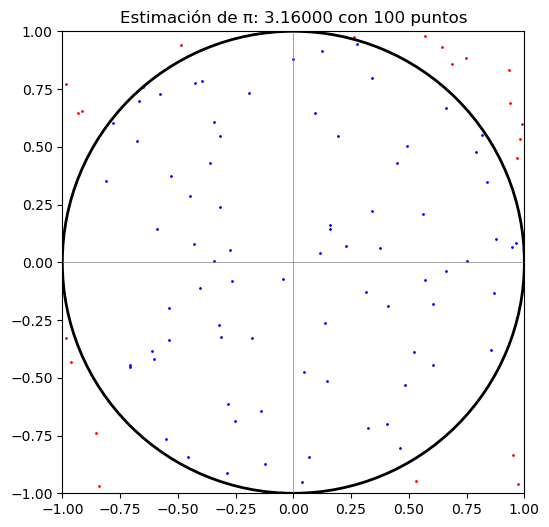

np.float64(3.16)

In [38]:
estimate_pi(100, True)

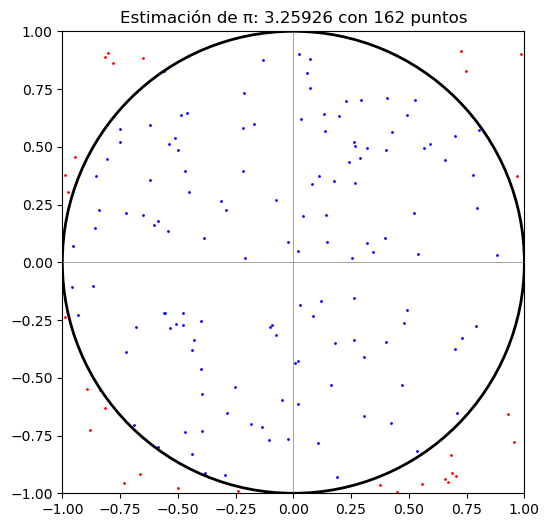

np.float64(3.259259259259259)

In [4]:
estimate_pi(162, True)

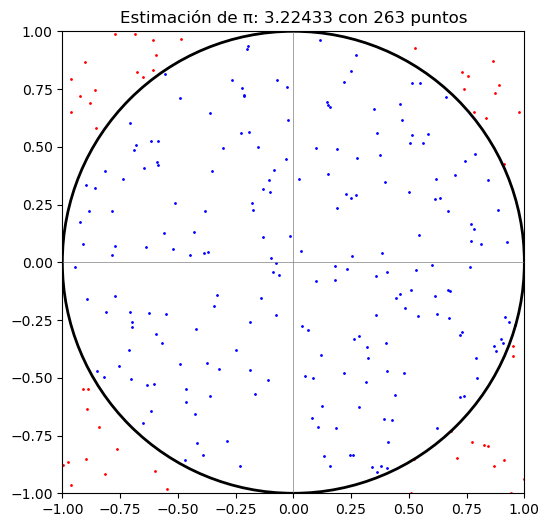

np.float64(3.2243346007604563)

In [7]:
estimate_pi(263, True)

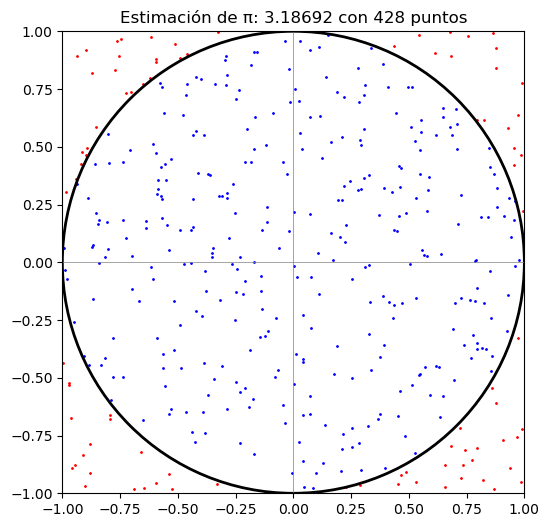

np.float64(3.1869158878504673)

In [8]:
estimate_pi(428, True)

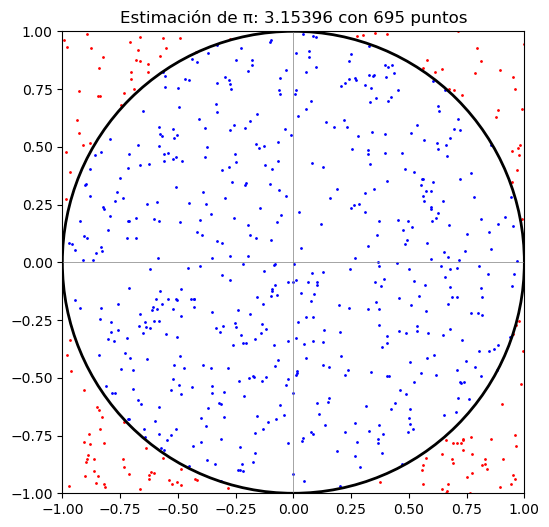

np.float64(3.1539568345323743)

In [9]:
estimate_pi(695, True)

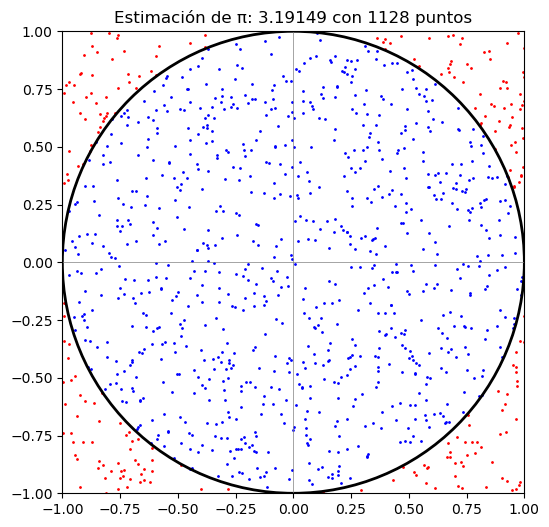

np.float64(3.1914893617021276)

In [10]:
estimate_pi(1128, True)

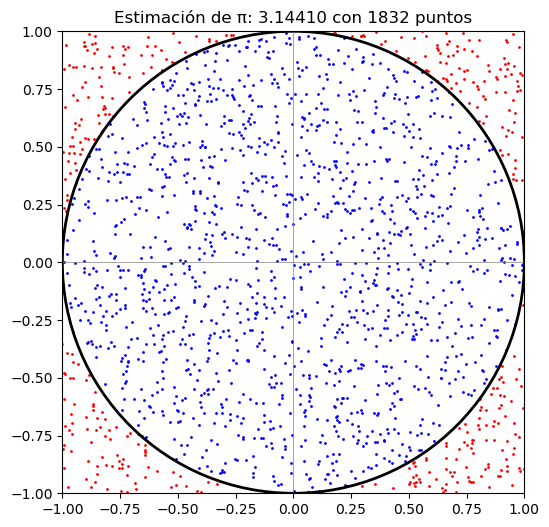

np.float64(3.1441048034934496)

In [11]:
estimate_pi(1832, True)

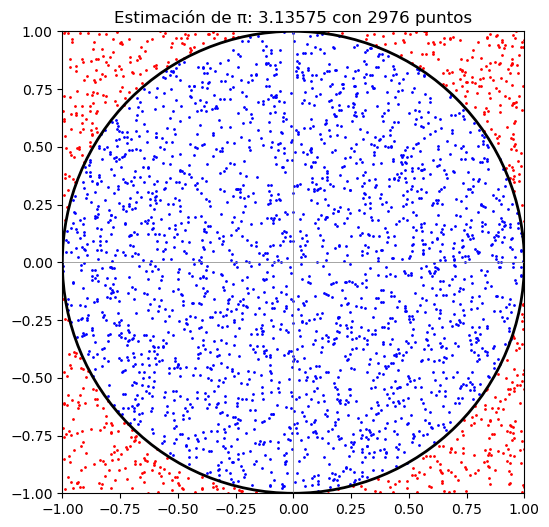

np.float64(3.135752688172043)

In [12]:
estimate_pi(2976, True)

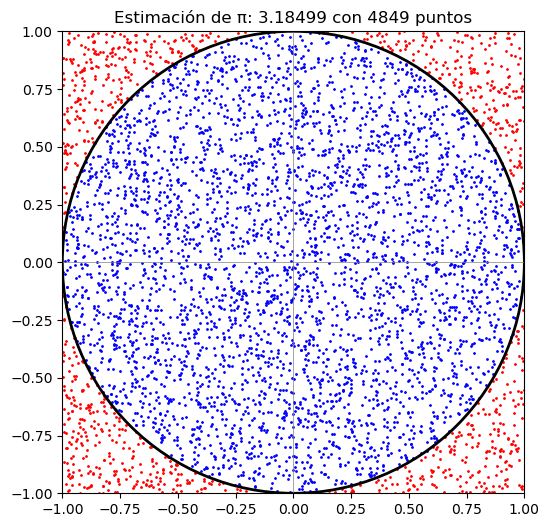

np.float64(3.1849865951742626)

In [46]:
estimate_pi(4849, True)

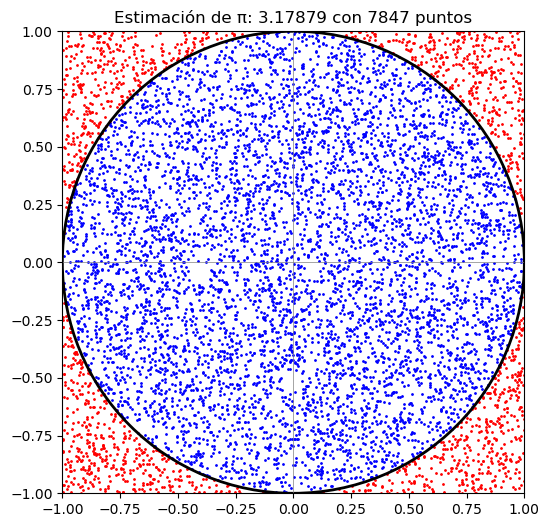

np.float64(3.17879444373646)

In [14]:
estimate_pi(7847, True)

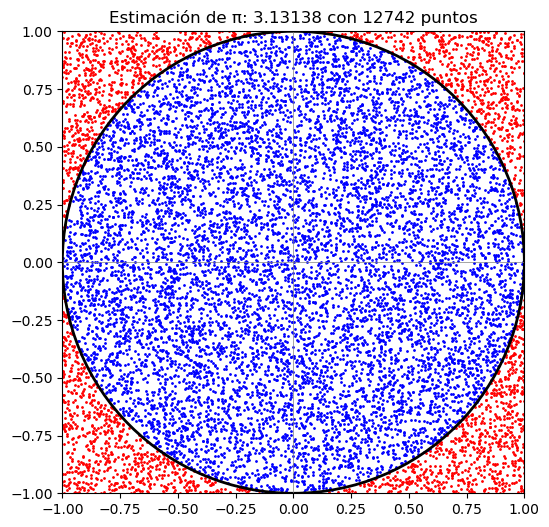

np.float64(3.1313765499921518)

In [15]:
estimate_pi(12742, True)

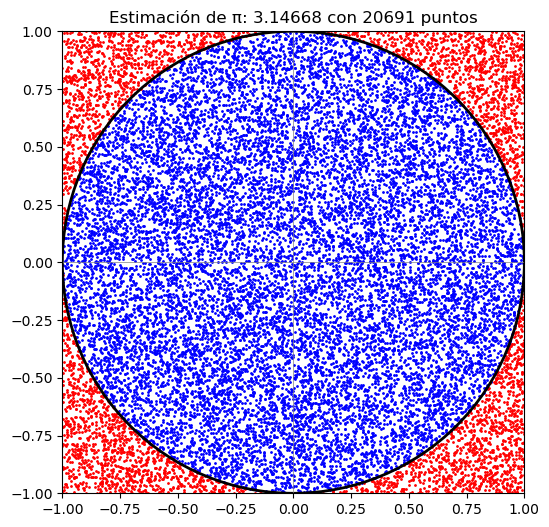

np.float64(3.146682132328065)

In [16]:
estimate_pi(20691, True)

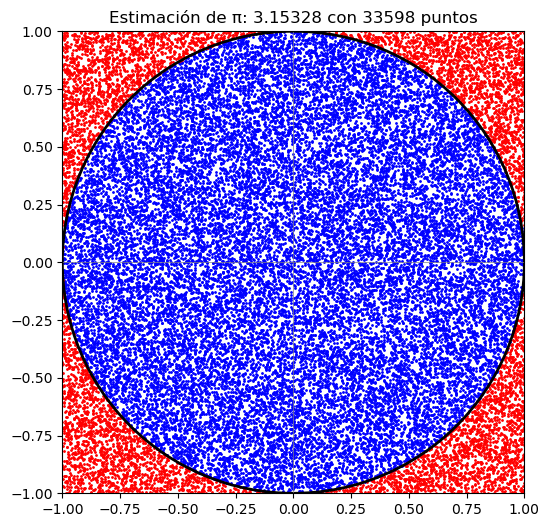

np.float64(3.153282933507947)

In [17]:
estimate_pi(33598, True)

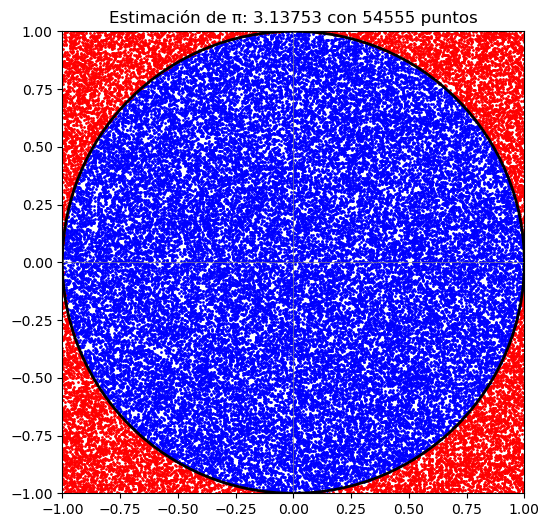

np.float64(3.137530932086885)

In [18]:
estimate_pi(54555, True)

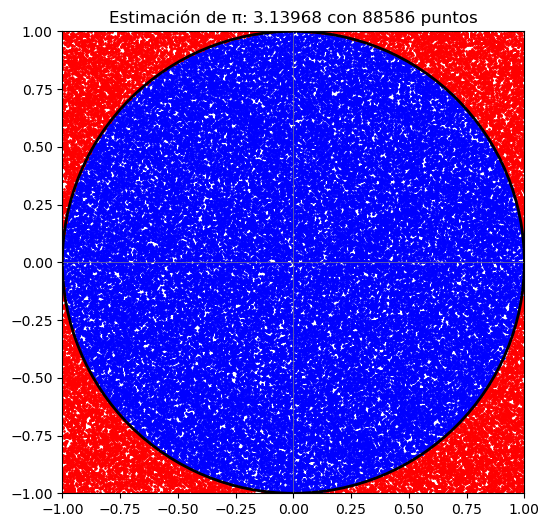

np.float64(3.139683471428894)

In [19]:
estimate_pi(88586, True)

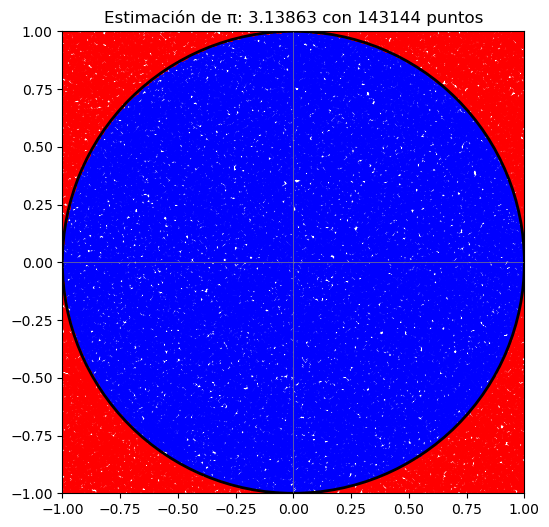

np.float64(3.1386296316995472)

In [47]:
estimate_pi(143144, True)

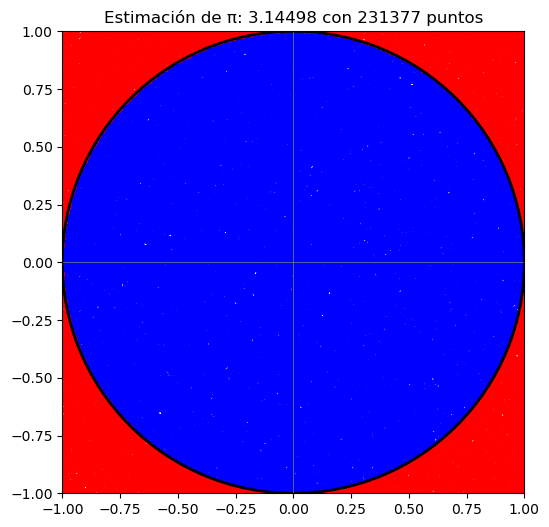

np.float64(3.1449798380997245)

In [48]:
estimate_pi(231377, True)

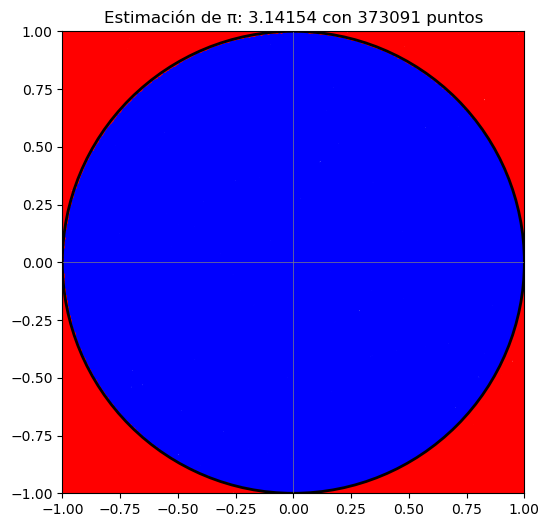

np.float64(3.141539195531385)

In [49]:
estimate_pi(373091, True)

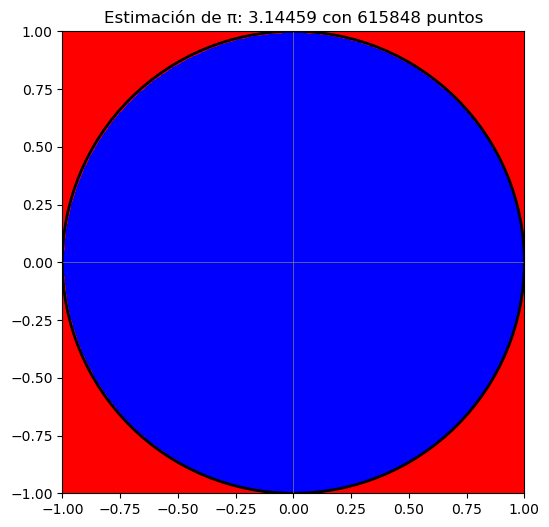

np.float64(3.144594120627168)

In [23]:
estimate_pi(615848, True)

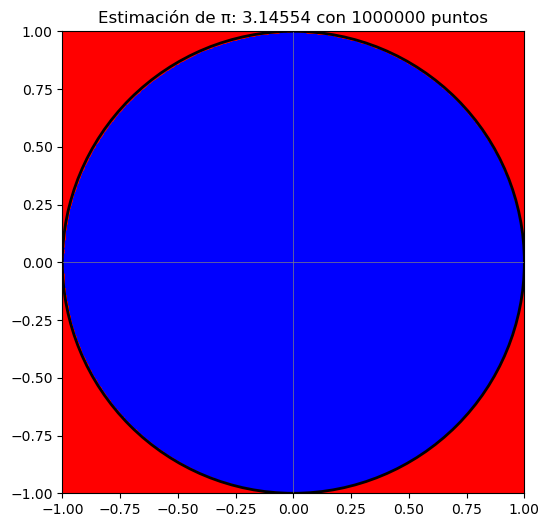

np.float64(3.145536)

In [24]:
estimate_pi(1000000, True)

##  Simulación con diferentes tamaños de muestra

A continuación vamos a generar un numero de muestras con las que vamos a probar la función.

Describe los parametros y la función `np.logspace`

In [26]:
sample_sizes = np.logspace(2, 6, num=20, dtype=int)  # De 10^2 a 10^6 puntos

In [27]:
print(sample_sizes)

[    100     162     263     428     695    1128    1832    2976    4832
    7847   12742   20691   33598   54555   88586  143844  233572  379269
  615848 1000000]


> **Nota importante:** La función `estimate_pi` genera un grafico si el parametro **show_plot** es True, en la definición de la función por defecto es Falso, verificar que no se use el valor *True* durante la simulación ya que estariamos generando cientos de graficos

Vamos a generar un arreglo de numpy con los valores de pi que nos retorna la función `estimate_pi` para cada valor de la lista **sample_sizes**

> **Nota importante:** El objeto `pi_estimates` debe ser un arreglo de numpy, debemos hacer la comverción ya que se definio como una lista vacia

In [28]:
pi_estimates = []
for n in sample_sizes:
    pi_value = estimate_pi(n)  
    pi_estimates.append(pi_value)
pi_estimates= np.array(pi_estimates)

In [29]:
pi_estimates

array([3.24      , 2.98765432, 2.99619772, 3.19626168, 3.18273381,
       3.11702128, 3.12663755, 3.13709677, 3.14321192, 3.15891423,
       3.14644483, 3.14320236, 3.13554378, 3.15131519, 3.13832886,
       3.14938405, 3.14388711, 3.1457778 , 3.14002806, 3.137752  ])

### Cálculo de incertidumbre (desviación estándar de múltiples corridas)

In [31]:
num_trials = 100  # Repetir la estimación N veces para obtener incertidumbre


Vamos a generar un arreglo de numpy con los valores de la desviación estandar al generar N veces los valores de pi para cada tamaño valor de tamaño de muestra.
Vamos a trabajar con ciclos anidados.

> **Nota importante:** Utiliza numpy para calcular la media


> **Nota importante:** El objeto `uncertainties` debe ser un arreglo de numpy, debemos hacer la converción ya que se el objeto se definio como una lista vacia

In [41]:
uncertainties = []
for sample_size in sample_sizes:
    pi_values = []  
    for _ in range(num_trials):
        pi_estimate = estimate_pi(sample_size)  
        pi_values.append(pi_estimate) 
    std_dev = np.std(pi_values)
    uncertainties.append(std_dev) 
uncertainties = np.array(uncertainties)

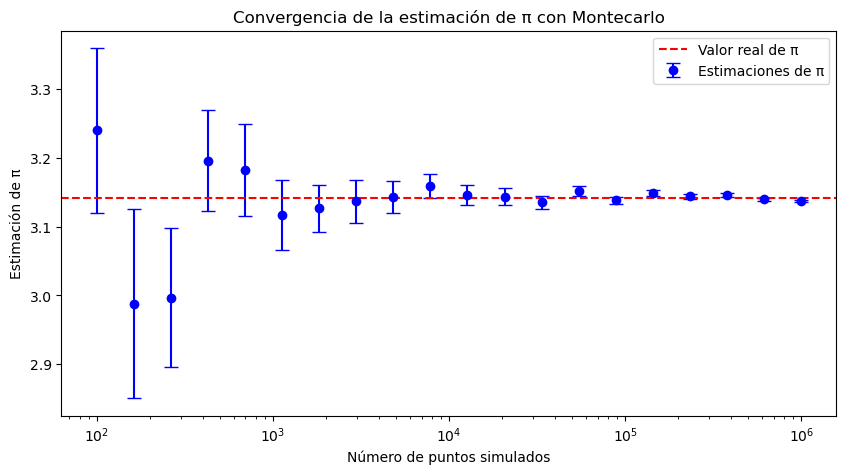

In [42]:
# Graficamos la convergencia de π y la incertidumbre
plt.figure(figsize=(10, 5))
plt.errorbar(sample_sizes, pi_estimates, yerr=uncertainties, fmt='o', capsize=5, color='blue', label='Estimaciones de π')
plt.axhline(y=np.pi, color='r', linestyle='--', label='Valor real de π')
plt.xscale("log")
plt.xlabel("Número de puntos simulados")
plt.ylabel("Estimación de π")
plt.legend()
plt.title("Convergencia de la estimación de π con Montecarlo")
plt.show()

In [44]:
uncertainties

array([0.11987927, 0.13730793, 0.10116927, 0.07300082, 0.06652899,
       0.05103992, 0.03448538, 0.03141483, 0.02309911, 0.01748153,
       0.01457694, 0.0123422 , 0.00961878, 0.00713588, 0.00536044,
       0.00449905, 0.0033498 , 0.00263831, 0.00208642, 0.00140109])

#### Graficar los valores de incetidumbre

Utilizamos el arreglo `uncertainties` donde almacenamos los valores de la incertidumbre, para cada una de las muestras.

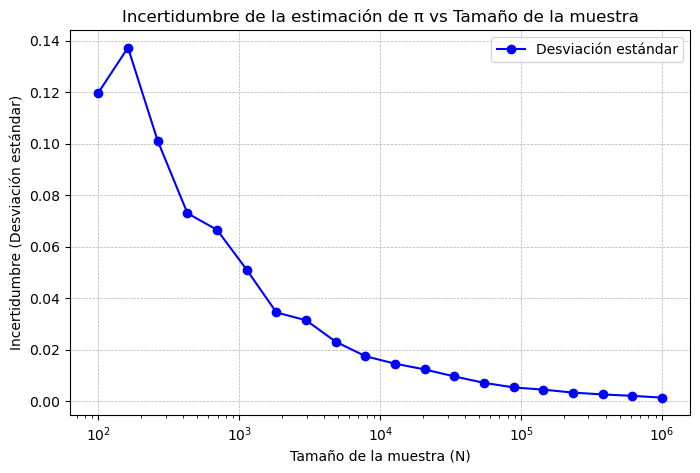

In [43]:
plt.figure(figsize=(8,5))
plt.plot(sample_sizes, uncertainties, marker='o', linestyle='-', color='blue', label="Desviación estándar")
plt.xscale("log")  
plt.xlabel("Tamaño de la muestra (N)")
plt.ylabel("Incertidumbre (Desviación estándar)")
plt.title("Incertidumbre de la estimación de π vs Tamaño de la muestra")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

## Calculo de Error

Por cada sample_size, vamos calcular el error absoluto al estimar el valor de pi con ese tamaño de nuestra.

> **Nota importante:** Utiliza `abs()` en el calculo de el error absoluto


In [39]:
errors = []

# Calcular error absoluto en cada iteración
for n in sample_sizes:
    pi_estimate = estimate_pi(n)  
    error = abs(pi_estimate - np.pi)  # Calcular el error absoluto
    errors.append(error)  


errors = np.array(errors)

In [45]:
errors

array([0.06159265, 0.09297525, 0.03711457, 0.03878892, 0.05670057,
       0.00329478, 0.07019774, 0.03717079, 0.00086418, 0.01885083,
       0.00864649, 0.01172943, 0.00295345, 0.00920929, 0.00990142,
       0.00248009, 0.00654222, 0.00497614, 0.00038248, 0.00432865])

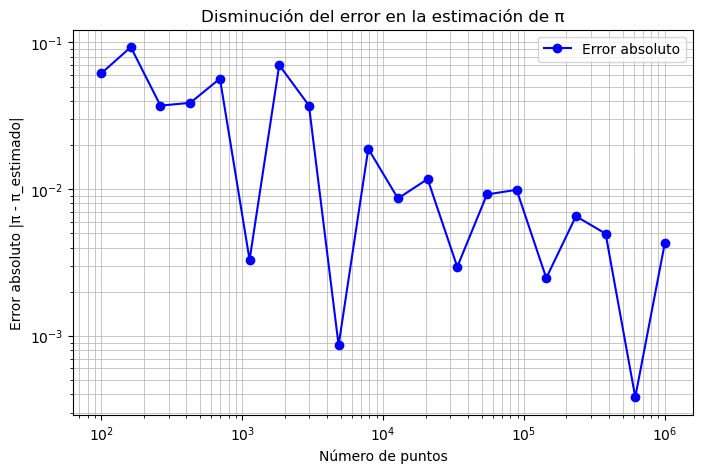

In [40]:
# Graficar el error
plt.figure(figsize=(8, 5))
plt.plot(sample_sizes, errors, marker='o', linestyle='-', color='blue', label="Error absoluto")
plt.xscale('log')  
plt.yscale('log')
plt.xlabel("Número de puntos")
plt.ylabel("Error absoluto |π - π_estimado|")
plt.title("Disminución del error en la estimación de π")
plt.axhline(0, color="black", linewidth=1, linestyle="--")
plt.legend()
plt.grid(True, which="both", linestyle="-", linewidth=0.5)
plt.show()